In [1]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [2]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [4]:
log_reg.score(X_test, y_test)

0.7481108312342569

In [22]:
from sklearn.cluster import KMeans
import numpy as np

k = 50
kmeans = KMeans(n_clusters=k, n_init=1, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

In [20]:
# np.argmin(X_digits_dist, axis=1)
# kmeans.predict(X_train)

array([31,  2, 38, ...,  7,  7,  5])

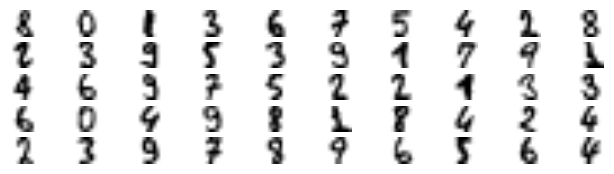

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

plt.show()

In [30]:
y_train[representative_digit_idx]

array([8, 0, 1, 3, 6, 7, 5, 4, 2, 8, 2, 3, 9, 5, 3, 9, 1, 7, 9, 1, 4, 6,
       9, 7, 5, 2, 2, 1, 3, 3, 6, 0, 4, 9, 8, 1, 8, 4, 2, 4, 2, 3, 9, 7,
       8, 9, 6, 5, 6, 4])

In [34]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_train[representative_digit_idx])
log_reg.score(X_test, y_test)

0.8337531486146096

In [46]:
### 50 random instance!

log_reg = LogisticRegression(max_iter=10_000)
np.random.seed(18)
random_indx = np.random.choice(np.arange(1400), 50)
log_reg.fit(X_train[random_indx], y_train[random_indx])
log_reg.score(X_test, y_test)

0.7355163727959698

In [53]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_train[representative_digit_idx][i]

In [56]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8690176322418136